In [1]:
import sqlite3 as sql
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm

import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
sys.path.append('/groups/icecube/cyan/Utils')
from PlotUtils import setMplParam, getColour, getHistoParam 
# getHistoParam:
# Nbins, binwidth, bins, counts, bin_centers = 
from DB_lister import list_content, list_tables
from ExternalFunctions import nice_string_output, add_text_to_ax
setMplParam()

In [3]:
root_dir = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/22012/"
pmt_dir_21 = root_dir + "21/"
pmt_dir_1 = root_dir + "1/"
truth_21 = root_dir + "truth_21.parquet"

truth_1 = root_dir + "truth_1.parquet"
truth_27 = root_dir + "truth_27.parquet"

In [4]:
# how many pmtfied files in the directory
print(f"Number of pmtfied files : {len(os.listdir(pmt_dir_21))}")

Number of pmtfied files : 15


In [5]:
dir_99999 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Snowstorm/99999/"
dir_99999_98 = dir_99999 + "98/"
dir_99999_99 = dir_99999 + "99/"
dir_99999_Corsika = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/9999999-9999999/"
dir_99999_Corsika_96 = dir_99999_Corsika + "96/"

In [6]:
print(f"Number of pmtfied files : {len(os.listdir(dir_99999_98))}")

Number of pmtfied files : 9


In [7]:
def convertParquetToDF(file:str) -> pd.DataFrame:
    table = pq.read_table(file)
    df = table.to_pandas()
    return df

In [8]:
df_99999_98_1 = convertParquetToDF(dir_99999_98 + "PMTfied_1.parquet")

In [9]:
df_99999_98_truth = convertParquetToDF(dir_99999 + "truth_98.parquet")

In [10]:
df_99999_98_1.columns

Index(['event_no', 'original_event_no', 'dom_x', 'dom_y', 'dom_z', 'dom_x_rel',
       'dom_y_rel', 'dom_z_rel', 'pmt_area', 'rde', 'saturation_status', 'q1',
       'q2', 'q3', 'q4', 'q5', 'Q25', 'Q75', 'Qtotal', 'hlc1', 'hlc2', 'hlc3',
       'hlc4', 'hlc5', 't1', 't2', 't3', 't4', 't5', 'T10', 'T50', 'sigmaT'],
      dtype='object')

In [11]:
df_99999_98_1[df_99999_98_1['q5']!=-1][['q1','q2', 'q3', 'q4', 'q5','Q25', 'Q75', 'Qtotal']]

,q1,q2,q3,q4,q5,Q25,Q75,Qtotal
17,0.202941,0.354172,-0.855666,0.072321,-0.980829,0.974560,1.123305,2.853592
18,-0.644357,-0.855666,-0.254892,0.354172,0.202941,-0.644357,-0.644357,3.747738
19,-0.393043,-0.321584,1.245595,0.281412,0.799757,0.336472,2.778819,4.434382
20,0.388658,0.161268,0.885831,0.821980,-1.123930,1.994700,2.714695,4.561740
21,0.242946,-0.470004,-0.025318,1.038508,0.354172,1.056053,2.608230,4.327768
...,...,...,...,...,...,...,...,...
1450,-0.025318,-1.491655,-0.254892,-0.980829,-0.025318,-0.025318,0.182322,1.201470
1455,0.117783,0.515813,0.354172,0.242946,0.117783,0.117783,1.029619,2.028148
1511,1.186318,0.628609,-0.133531,-0.254892,-0.393043,1.638997,1.795918,2.011564
1513,0.024693,-0.553385,-0.644357,0.318454,-0.192372,0.470004,0.470004,1.766442


In [30]:
df_99999_98_1['q5'].value_counts()

q5
-1.000000    959
-0.254892     29
 0.024693     28
 0.072321     27
-0.025318     25
            ... 
 1.090244      1
 1.531476      1
 1.927892      1
 1.935138      1
 3.038552      1
Name: count, Length: 114, dtype: int64

In [12]:
df_99999_98_truth

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid
0,199009800001419,1419,99,98,1,213,213,1.228535e+06,4.320621,0.735934,14.0
1,199009800001420,1420,99,98,1,317,530,7.616068e+06,1.721122,1.112967,-14.0
2,199009800001421,1421,99,98,1,189,719,4.883525e+07,4.324323,1.747017,-14.0
3,199009800001422,1422,99,98,1,40,759,7.368295e+07,5.271961,2.011045,-14.0
4,199009800001423,1423,99,98,1,309,1068,2.270513e+07,5.554580,1.739628,-14.0
...,...,...,...,...,...,...,...,...,...,...,...
69,199009800001488,1488,99,98,7,243,4017,7.586169e+06,3.289613,0.991989,14.0
70,199009800001489,1489,99,98,8,24,24,2.344431e+07,2.390422,0.236707,-14.0
71,199009800001490,1490,99,98,8,393,417,1.908850e+07,5.173692,0.628225,-14.0
72,199009800001491,1491,99,98,8,961,1378,4.262259e+07,4.707403,1.459073,-14.0


In [13]:
df_99999_98_1[["dom_x_rel", "dom_y_rel", "dom_z_rel"]]

,dom_x_rel,dom_y_rel,dom_z_rel
0,-158.001236,-400.039368,152.750031
1,-34.821243,-380.659363,89.050034
2,-88.631241,-299.709381,146.170029
3,-88.631241,-299.709381,129.150024
4,-88.631241,-299.709381,78.090027
...,...,...,...
1532,-2.138501,7.737176,-133.666534
1533,-2.138501,7.737176,-147.686539
1534,-69.018501,33.757175,74.573456
1535,-69.018501,33.757175,-44.576542


In [14]:
df_99999_98_1[["dom_x_rel", "dom_y_rel", "dom_z_rel"]].describe()

,dom_x_rel,dom_y_rel,dom_z_rel
count,1537.000000,1537.000000,1537.000000
mean,-21.870615,23.349905,-8.857996
std,146.952805,177.395126,122.697540
min,-496.876312,-479.066589,-396.859955
25%,-108.501244,-90.336601,-80.649971
50%,-22.188471,32.097382,-7.206541
75%,53.851498,146.437378,69.661201
max,420.445099,554.267395,539.783447


In [15]:
truth_df = convertParquetToDF(truth_1)

In [16]:
pmtfied_df_1 = convertParquetToDF(pmt_dir_1 + os.listdir(pmt_dir_1)[0])
pmtfied_df_2 = convertParquetToDF(pmt_dir_1 + os.listdir(pmt_dir_1)[1])
pmtfied_df_3 = convertParquetToDF(pmt_dir_1 + os.listdir(pmt_dir_1)[2])

In [17]:
truth_df

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid
0,112000100000000,0,12,1,1,28,28,8.238094e+06,5.843885,0.917283,-14.0
1,112000100000001,1,12,1,1,132,160,5.375572e+07,5.431356,1.708568,14.0
2,112000100000002,2,12,1,1,313,473,2.576900e+07,2.869423,0.965348,14.0
3,112000100000003,3,12,1,1,279,752,6.547825e+06,5.131130,0.480436,14.0
4,112000100000004,4,12,1,1,741,1493,8.446194e+07,0.912671,0.921206,14.0
...,...,...,...,...,...,...,...,...,...,...,...
29381,112000100029381,29381,12,1,15,264,493608,6.344052e+06,2.746214,0.611205,-14.0
29382,112000100029382,29382,12,1,15,365,493973,4.438849e+06,0.573137,0.925718,-14.0
29383,112000100029383,29383,12,1,15,232,494205,1.867177e+07,3.502039,0.844169,14.0
29384,112000100029384,29384,12,1,15,32,494237,1.297350e+07,2.180361,2.612760,14.0


In [18]:
pmtfied_df_1.columns

Index(['event_no', 'original_event_no', 'dom_x', 'dom_y', 'dom_z', 'dom_x_rel',
       'dom_y_rel', 'dom_z_rel', 'pmt_area', 'rde', 'saturation_status', 'q1',
       'q2', 'q3', 'q4', 'q5', 'Q25', 'Q75', 'Qtotal', 'hlc1', 'hlc2', 'hlc3',
       'hlc4', 'hlc5', 't1', 't2', 't3', 't4', 't5', 'T10', 'T50', 'sigmaT'],
      dtype='object')

In [19]:
# dir_corsika_root = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Corsika/"
# dir_99999_Corsika_96 + "PMTfied_1.parquet"
# # list all the subdirectories
# print(f"subdirectories: {os.listdir(dir_corsika_root)}")

In [20]:
dir_99999_96_1_truth = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/9999999-9999999/truth_96.parquet"
df_99999_96_1_truth = convertParquetToDF(dir_99999_96_1_truth)
df_99999_96_1 = convertParquetToDF(dir_99999_Corsika_96 + "PMTfied_1.parquet")
df_99999_96_2 = convertParquetToDF(dir_99999_Corsika_96 + "PMTfied_2.parquet")
df_99999_96_3 = convertParquetToDF(dir_99999_Corsika_96 + "PMTfied_3.parquet")

In [21]:
df_99999_96_1_truth.head(10)

,event_no,original_event_no,subdirectory_no,part_no,shard_no,N_doms,offset,energy,azimuth,zenith,pid
0,29999009600000998,998,9999,96,1,22,22,1.874912e+07,4.750796,2.455312,16.0
1,29999009600000999,999,9999,96,1,1273,1295,1.016963e+07,3.674500,1.136522,16.0
2,29999009600001000,1000,9999,96,1,186,1481,3.594028e+07,5.191782,1.303075,-16.0
3,29999009600001001,1001,9999,96,1,57,1538,2.367507e+06,0.497355,0.987259,16.0
4,29999009600001002,1002,9999,96,1,18,1556,9.184113e+07,0.753964,0.435040,16.0
5,29999009600001003,1003,9999,96,1,49,1605,1.095522e+07,3.650720,0.483947,-16.0
6,29999009600001004,1004,9999,96,1,31,1636,2.200158e+06,4.546360,1.750014,-16.0
7,29999009600001005,1005,9999,96,1,38,1674,6.618464e+06,4.112503,1.089258,-16.0
8,29999009600001006,1006,9999,96,1,137,1811,1.273245e+07,3.574903,0.442635,-16.0
9,29999009600001007,1007,9999,96,1,877,2688,1.598543e+06,2.979930,0.400652,-16.0


In [22]:
df_99999_96_1.head(10)

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,29999009600000998,998,-32.959999,62.439999,-491.390015,-1.184414,-236.584335,-140.878052,0.0444,1.0,...,0.975,0,-1,-1,9984.0,-1.0,-1.0,-1.0,-1.0,4706.974121
1,29999009600000998,998,11.870000,179.190002,-433.799988,43.645588,-119.834335,-83.288055,0.0444,1.0,...,0.375,0,-1,-1,9939.0,-1.0,-1.0,-1.0,-1.0,4685.760742
2,29999009600000998,998,11.870000,179.190002,-484.359985,43.645588,-119.834335,-133.848053,0.0444,1.0,...,1.125,0,-1,-1,10017.0,-1.0,-1.0,-1.0,-1.0,4722.530273
3,29999009600000998,998,-189.979996,257.420013,-468.829987,-158.204407,-41.604340,-118.318054,0.0444,1.0,...,0.925,0,-1,-1,10272.0,-1.0,-1.0,-1.0,-1.0,4842.738770
4,29999009600000998,998,-66.699997,276.920013,-285.130005,-34.924412,-22.104340,65.381943,0.0444,1.0,...,0.925,1,-1,-1,10393.0,-1.0,-1.0,-1.0,-1.0,4899.778809
5,29999009600000998,998,-66.699997,276.920013,-319.170013,-34.924412,-22.104340,31.341944,0.0444,1.0,...,1.650,1,1,-1,10235.0,10444.0,-1.0,0.0,0.0,4875.305176
6,29999009600000998,998,-66.699997,276.920013,-353.209991,-34.924412,-22.104340,-2.698056,0.0444,1.0,...,2.150,1,1,-1,10075.0,10860.0,-1.0,0.0,0.0,4945.292969
7,29999009600000998,998,-66.699997,276.920013,-404.279999,-34.924412,-22.104340,-53.768055,0.0444,1.0,...,0.775,1,-1,-1,9885.0,-1.0,-1.0,-1.0,-1.0,4660.305176
8,29999009600000998,998,-66.699997,276.920013,-421.299988,-34.924412,-22.104340,-70.788055,0.0444,1.0,...,1.575,1,-1,-1,9909.0,-1.0,-1.0,-1.0,-1.0,4671.618652
9,29999009600000998,998,-66.699997,276.920013,-506.399994,-34.924412,-22.104340,-155.888062,0.0444,1.0,...,0.525,0,-1,-1,10009.0,-1.0,-1.0,-1.0,-1.0,4718.759277


In [23]:
dir_corsika_30_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0003000-0003999/"
dir_corsika_30_pmtfied_1 = dir_corsika_30_pmtfied + "/1/"
dir_corsika_30_pmtfied_2 = dir_corsika_30_pmtfied + "/2/"

dir_corsika_40_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0004000-0004999/"
dir_corsika_40_pmtfied_1 = dir_corsika_40_pmtfied + "/1/"
dir_corsika_40_pmtfied_2 = dir_corsika_40_pmtfied + "/2/"

dir_corsika_50_pmtfied = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/PMTfied/Corsika/0005000-0005999/"
dir_corsika_50_pmtfied_1 = dir_corsika_50_pmtfied + "/1/"
dir_corsika_50_pmtfied_2 = dir_corsika_50_pmtfied + "/2/"

In [24]:
df_corsika_30_1_truth = convertParquetToDF(dir_corsika_30_pmtfied + "truth_1.parquet")
df_corsika_30_2_truth = convertParquetToDF(dir_corsika_30_pmtfied + "truth_2.parquet")
df_corsika_30_1 = convertParquetToDF(dir_corsika_30_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_30_2 = convertParquetToDF(dir_corsika_30_pmtfied_2 + "PMTfied_2.parquet")

df_corsika_40_1_truth = convertParquetToDF(dir_corsika_40_pmtfied + "truth_1.parquet")
df_corsika_40_2_truth = convertParquetToDF(dir_corsika_40_pmtfied + "truth_2.parquet")
df_corsika_40_1 = convertParquetToDF(dir_corsika_40_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_40_2 = convertParquetToDF(dir_corsika_40_pmtfied_2 + "PMTfied_2.parquet")

df_corsika_50_1_truth = convertParquetToDF(dir_corsika_50_pmtfied + "truth_1.parquet")
df_corsika_50_2_truth = convertParquetToDF(dir_corsika_50_pmtfied + "truth_2.parquet")
df_corsika_50_1 = convertParquetToDF(dir_corsika_50_pmtfied_1 + "PMTfied_1.parquet")
df_corsika_50_2 = convertParquetToDF(dir_corsika_50_pmtfied_2 + "PMTfied_2.parquet")
# 3 sec

In [25]:
df_corsika_30_1_truth['pid'].value_counts()

pid
2.212000e+03    93623
1.000020e+09    58212
1.000070e+09    40743
1.000130e+09    27927
1.000261e+09    13772
Name: count, dtype: int64

In [26]:
df_corsika_30_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,23039000100000000,0,237.779999,-442.420013,41.900002,-184.780396,-415.804230,-310.587311,0.0444,1.0,...,0.450,1,1,-1,13096.0,13308.0,-1.0,0.0,0.0,6224.555664
1,23039000100000000,0,237.779999,-442.420013,24.879999,-184.780396,-415.804230,-327.607300,0.0444,1.0,...,0.425,1,-1,-1,13055.0,-1.0,-1.0,-1.0,-1.0,6154.657227
2,23039000100000000,0,237.779999,-442.420013,7.860000,-184.780396,-415.804230,-344.627289,0.0444,1.0,...,0.675,1,-1,-1,13840.0,-1.0,-1.0,-1.0,-1.0,6524.709961
3,23039000100000000,0,361.000000,-422.829987,91.019997,-61.560390,-396.214203,-261.467316,0.0444,1.0,...,1.175,1,-1,-1,12551.0,-1.0,-1.0,-1.0,-1.0,5917.069336
4,23039000100000000,0,361.000000,-422.829987,74.000000,-61.560390,-396.214203,-278.487305,0.0444,1.0,...,2.725,1,1,1,12521.0,13691.0,13997.0,0.0,1170.0,636.056580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902745,23039000100019999,19999,429.760010,351.019989,-293.829987,-14.481354,145.632324,0.673801,0.0444,1.0,...,0.825,0,-1,-1,12027.0,-1.0,-1.0,-1.0,-1.0,5670.053711
2902746,23039000100019999,19999,429.760010,351.019989,-310.850006,-14.481354,145.632324,-16.346218,0.0444,1.0,...,1.025,1,1,1,10962.0,11046.0,11324.0,0.0,0.0,154.698273
2902747,23039000100019999,19999,429.760010,351.019989,-344.890015,-14.481354,145.632324,-50.386227,0.0444,1.0,...,0.725,1,-1,-1,11329.0,-1.0,-1.0,-1.0,-1.0,5341.013184
2902748,23039000100019999,19999,429.760010,351.019989,-361.910004,-14.481354,145.632324,-67.406219,0.0444,1.0,...,0.925,1,-1,-1,11649.0,-1.0,-1.0,-1.0,-1.0,5491.862793


In [27]:
df_corsika_30_2

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,23039000200254277,254277,46.290001,-34.880001,-452.190002,40.464638,-487.188721,-428.923889,0.0444,1.35,...,0.875,0,-1,-1,16851.0,-1.0,-1.0,-1.0,-1.0,7944.108887
1,23039000200254277,254277,-32.959999,62.439999,-202.039993,-38.785362,-389.868744,-178.773895,0.0444,1.00,...,0.775,0,-1,-1,15301.0,-1.0,-1.0,-1.0,-1.0,7213.432129
2,23039000200254277,254277,-32.959999,62.439999,-491.390015,-38.785362,-389.868744,-468.123901,0.0444,1.00,...,1.075,0,-1,-1,18511.0,-1.0,-1.0,-1.0,-1.0,8726.640625
3,23039000200254277,254277,-32.959999,62.439999,-508.410004,-38.785362,-389.868744,-485.143890,0.0444,1.00,...,1.225,0,-1,-1,14671.0,-1.0,-1.0,-1.0,-1.0,6916.447266
4,23039000200254277,254277,90.489998,82.349998,-281.290009,84.664635,-369.958740,-258.023895,0.0444,1.00,...,3.100,1,1,-1,14718.0,14758.0,-1.0,0.0,40.0,6948.050293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2952803,23039000200274276,274276,-526.630005,-15.600000,485.640015,-6.743153,86.585510,15.199795,0.0444,1.00,...,11.425,1,1,1,10469.0,10528.0,10545.0,59.0,138.0,32.567879
2952804,23039000200274276,274276,-526.630005,-15.600000,468.619995,-6.743153,86.585510,-1.820225,0.0444,1.00,...,14.175,1,1,1,10451.0,10500.0,10533.0,49.0,468.0,33.688110
2952805,23039000200274276,274276,-526.630005,-15.600000,451.600006,-6.743153,86.585510,-18.840214,0.0444,1.00,...,14.475,1,1,1,10525.0,10553.0,10573.0,28.0,230.0,19.686430
2952806,23039000200274276,274276,-526.630005,-15.600000,434.579987,-6.743153,86.585510,-35.860233,0.0444,1.00,...,3.825,1,1,1,10574.0,10681.0,10900.0,107.0,831.0,135.681824


In [28]:
print(df_corsika_30_1_truth['pid'].value_counts())
print(df_corsika_30_2_truth['pid'].value_counts())
print(df_corsika_40_1_truth['pid'].value_counts())
print(df_corsika_40_2_truth['pid'].value_counts())
print(df_corsika_50_1_truth['pid'].value_counts())
print(df_corsika_50_2_truth['pid'].value_counts())

pid
2.212000e+03    93623
1.000020e+09    58212
1.000070e+09    40743
1.000130e+09    27927
1.000261e+09    13772
Name: count, dtype: int64
pid
2.212000e+03    92227
1.000020e+09    57719
1.000070e+09    40486
1.000130e+09    28180
1.000261e+09    13641
Name: count, dtype: int64
pid
2.212000e+03    92575
1.000020e+09    57874
1.000070e+09    40514
1.000130e+09    28001
1.000261e+09    13740
Name: count, dtype: int64
pid
2.212000e+03    91557
1.000020e+09    57389
1.000070e+09    40156
1.000130e+09    27946
1.000261e+09    13504
Name: count, dtype: int64
pid
2.212000e+03    93258
1.000020e+09    58290
1.000070e+09    41152
1.000130e+09    28207
1.000261e+09    13916
Name: count, dtype: int64
pid
2.212000e+03    92622
1.000020e+09    58215
1.000070e+09    40616
1.000130e+09    28243
1.000261e+09    13753
Name: count, dtype: int64


### some PID in corsika
* `2212`: PPlus
* `1.000020e+09`: He Nucleus
* `1.000070e+09`: N Nucleus
* `1.000130e+09`: Al Nucleus
* `1.000261e+09`: Fe Nucleus

In [29]:
Gandalf: Run All shall not pass!

SyntaxError: invalid syntax (1272382023.py, line 1)

In [ ]:
def checkNcolumns(pmt_dir):
    for file in os.listdir(pmt_dir):
        df = convertParquetToDF(pmt_dir + file)
        print(f"{file} : {len(df.columns)}")

In [ ]:
checkNcolumns(pmt_dir_21)

PMTfied_1.parquet : 26
PMTfied_5.parquet : 25
PMTfied_9.parquet : 25
PMTfied_10.parquet : 25
PMTfied_14.parquet : 25
PMTfied_8.parquet : 25
PMTfied_4.parquet : 25
PMTfied_11.parquet : 25
PMTfied_15.parquet : 25
PMTfied_13.parquet : 25
PMTfied_2.parquet : 25
PMTfied_6.parquet : 25
PMTfied_12.parquet : 25
PMTfied_3.parquet : 25
PMTfied_7.parquet : 25


In [ ]:
pmtfied_df_1

,event_no,original_event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,1221584664,584664,114.389999,-461.989990,464.619995,0.000000e+00,0.000000e+00,0.000000,0.0444,1.0,...,1.075,0,-1,-1,12687.0,-1.0,-1.0,-1.0,-1.0,5981.180664
1,1221584664,584664,35.540001,-364.829987,497.709991,-7.105427e-15,1.136868e-13,38.593739,0.0444,1.0,...,3.650,1,1,1,9950.0,10199.0,10233.0,0.0,249.0,126.159508
2,1221584664,584664,35.540001,-364.829987,480.690002,-7.105427e-15,1.136868e-13,21.573738,0.0444,1.0,...,0.825,1,-1,-1,10406.0,-1.0,-1.0,-1.0,-1.0,4905.906738
3,1221584664,584664,35.540001,-364.829987,463.670013,-7.105427e-15,1.136868e-13,4.553738,0.0444,1.0,...,3.950,1,1,1,10514.0,10833.0,10913.0,0.0,319.0,172.356873
4,1221584664,584664,35.540001,-364.829987,446.649994,-7.105427e-15,1.136868e-13,-12.466262,0.0444,1.0,...,1.300,1,1,-1,10494.0,10754.0,-1.0,0.0,260.0,5009.797852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
713628,1221586747,586747,-166.399994,-287.790009,-506.440002,2.842171e-14,0.000000e+00,-35.289173,0.0444,1.0,...,0.875,1,-1,-1,14269.0,-1.0,-1.0,-1.0,-1.0,6726.942383
713629,1221586747,586747,-492.429993,-230.160004,-455.559998,5.684342e-14,0.000000e+00,25.530001,0.0444,1.0,...,0.325,1,-1,-1,13281.0,-1.0,-1.0,-1.0,-1.0,6261.194824
713630,1221586747,586747,-492.429993,-230.160004,-489.600006,5.684342e-14,0.000000e+00,-8.509999,0.0444,1.0,...,0.975,1,-1,-1,12540.0,-1.0,-1.0,-1.0,-1.0,5911.884277
713631,1221586747,586747,-368.929993,-210.229996,-486.670013,0.000000e+00,0.000000e+00,0.000000,0.0444,1.0,...,0.625,0,-1,-1,12730.0,-1.0,-1.0,-1.0,-1.0,6001.451172


In [ ]:
pmtfied_df_2

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,592748,-166.399994,-287.790009,174.259995,-2.842171e-14,5.684342e-14,89.722908,0.0444,1.00,-1,...,0.825,1,-1,-1,9997.0,-1.0,-1.0,-1.0,-1.0,4713.102539
1,592748,-166.399994,-287.790009,140.220001,-2.842171e-14,5.684342e-14,55.682907,0.0444,1.00,-1,...,0.575,1,-1,-1,9867.0,-1.0,-1.0,-1.0,-1.0,4651.819824
2,592748,-166.399994,-287.790009,123.199997,-2.842171e-14,5.684342e-14,38.662910,0.0444,1.00,-1,...,0.275,1,-1,-1,9991.0,-1.0,-1.0,-1.0,-1.0,4710.273926
3,592748,-166.399994,-287.790009,106.180000,-2.842171e-14,5.684342e-14,21.642908,0.0444,1.00,-1,...,0.975,1,-1,-1,9996.0,-1.0,-1.0,-1.0,-1.0,4712.630859
4,592748,-166.399994,-287.790009,89.160004,-2.842171e-14,5.684342e-14,4.622909,0.0444,1.00,-1,...,1.575,1,-1,-1,9872.0,-1.0,-1.0,-1.0,-1.0,4654.176758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687082,594747,429.760010,351.019989,-498.079987,5.684342e-14,0.000000e+00,-14.679750,0.0444,1.00,-1,...,1.425,0,-1,-1,14783.0,-1.0,-1.0,-1.0,-1.0,6969.244629
687083,594747,41.599998,35.490002,-403.200012,0.000000e+00,0.000000e+00,0.000000,0.0444,1.35,-1,...,0.925,0,-1,-1,13046.0,-1.0,-1.0,-1.0,-1.0,6150.414551
687084,594747,113.190002,-60.470001,-406.399994,1.421085e-14,0.000000e+00,14.578199,0.0444,1.35,-1,...,0.925,0,-1,-1,12611.0,-1.0,-1.0,-1.0,-1.0,5945.354004
687085,594747,113.190002,-60.470001,-462.470001,1.421085e-14,0.000000e+00,-41.491802,0.0444,1.35,-1,...,0.325,0,-1,-1,13656.0,-1.0,-1.0,-1.0,-1.0,6437.971680


In [ ]:
pmtfied_df_3

,event_no,dom_x,dom_y,dom_z,dom_x_rel,dom_y_rel,dom_z_rel,pmt_area,rde,saturation_status,...,Qtotal,hlc1,hlc2,hlc3,t1,t2,t3,T10,T50,sigmaT
0,600748,500.429993,-58.450001,331.649994,-5.684342e-14,7.105427e-15,104.810020,0.0444,1.0,0,...,1.275,1,-1,-1,13557.0,-1.0,-1.0,-1.0,-1.0,6391.302734
1,600748,500.429993,-58.450001,314.630005,-5.684342e-14,7.105427e-15,87.790024,0.0444,1.0,0,...,1.875,1,1,0,13229.0,14730.0,23988.0,0.0,1501.0,4757.679688
2,600748,500.429993,-58.450001,297.609985,-5.684342e-14,7.105427e-15,70.770027,0.0444,1.0,0,...,1.475,1,-1,-1,12607.0,-1.0,-1.0,-1.0,-1.0,5943.468262
3,600748,500.429993,-58.450001,280.579987,-5.684342e-14,7.105427e-15,53.740025,0.0444,1.0,0,...,4.325,1,1,1,12393.0,12471.0,12586.0,0.0,193.0,79.273087
4,600748,500.429993,-58.450001,263.559998,-5.684342e-14,7.105427e-15,36.720024,0.0444,1.0,0,...,2.700,1,1,-1,12425.0,12631.0,-1.0,0.0,206.0,5906.826172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717653,602747,303.410004,335.640015,461.890015,5.684342e-14,0.000000e+00,7.154905,0.0444,1.0,-1,...,1.450,1,1,-1,13736.0,13861.0,-1.0,0.0,125.0,6505.346680
717654,602747,303.410004,335.640015,427.850006,5.684342e-14,0.000000e+00,-26.885096,0.0444,1.0,-1,...,1.650,1,1,-1,13846.0,14604.0,-1.0,0.0,0.0,6713.336426
717655,602747,429.760010,351.019989,438.059998,-5.684342e-14,0.000000e+00,27.398048,0.0444,1.0,-1,...,1.225,0,-1,-1,14290.0,-1.0,-1.0,-1.0,-1.0,6736.841797
717656,602747,429.760010,351.019989,369.980011,-5.684342e-14,0.000000e+00,-40.681953,0.0444,1.0,-1,...,0.825,0,-1,-1,16198.0,-1.0,-1.0,-1.0,-1.0,7636.281738


In [ ]:
df_truth_1 = convertParquetToDF(truth_1)

In [ ]:
df_truth_27 = convertParquetToDF(truth_27)

count    2.938600e+04
mean     2.267654e+07
std      2.538212e+07
min      1.000207e+06
25%      3.451816e+06
50%      1.121124e+07
75%      3.428168e+07
max      9.999616e+07
Name: energy, dtype: float64

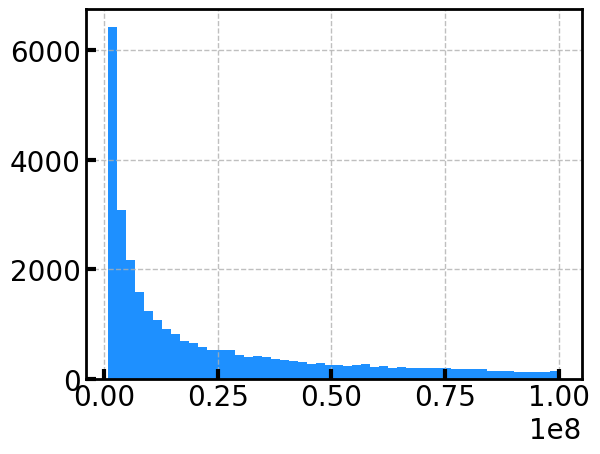

In [ ]:
df_truth_1['energy'].hist(bins=50)
df_truth_1['energy'].describe()

count    2.796700e+04
mean     2.271997e+07
std      2.546016e+07
min      1.000226e+06
25%      3.477298e+06
50%      1.135521e+07
75%      3.430493e+07
max      9.998384e+07
Name: energy, dtype: float64

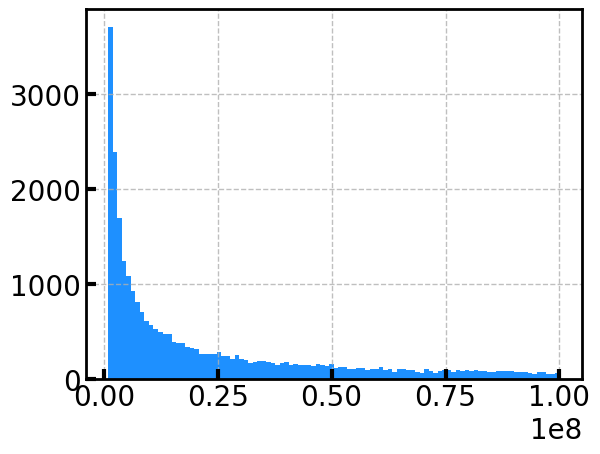

In [ ]:
df_truth_27['energy'].hist(bins=100)
df_truth_27['energy'].describe()

In [ ]:
def printStatsForAllParquetInDir(directory: str):
    for file in os.listdir(directory):
        if file.endswith('.parquet'):
            print(f"Statistics for {file}")
            # Assuming convertParquetToDF is a pre-defined function that reads a parquet file into a DataFrame
            df = convertParquetToDF(os.path.join(directory, file))
            stats = pd.DataFrame({
                "Metric": ["Min", "Max", "Mean", "Median"],
                "Energy": [
                    df['energy'].min(),
                    df['energy'].max(),
                    df['energy'].mean(),
                    df['energy'].median()
                ],
                "N_doms": [
                    df['N_doms'].min(),
                    df['N_doms'].max(),
                    df['N_doms'].mean(),
                    df['N_doms'].median()
                ]
            })
            print(stats)


In [ ]:
printStatsForAllParquetInDir(root_dir)

Statistics for truth_8.parquet
   Metric        Energy       N_doms
0     Min  1.000074e+06     4.000000
1     Max  9.998628e+07  2531.000000
2    Mean  2.273861e+07   358.246864
3  Median  1.133401e+07   201.000000
Statistics for truth_27.parquet
   Metric        Energy       N_doms
0     Min  1.000226e+06     4.000000
1     Max  9.998384e+07  2651.000000
2    Mean  2.271997e+07   355.856939
3  Median  1.135521e+07   203.000000
Statistics for truth_4.parquet
   Metric        Energy      N_doms
0     Min  1.000129e+06     5.00000
1     Max  9.998930e+07  2614.00000
2    Mean  2.282914e+07   357.77988
3  Median  1.132350e+07   203.00000
Statistics for truth_23.parquet
   Metric        Energy       N_doms
0     Min  1.000007e+06     4.000000
1     Max  9.999438e+07  2722.000000
2    Mean  2.270526e+07   354.985484
3  Median  1.116558e+07   199.000000
Statistics for truth_15.parquet
   Metric        Energy       N_doms
0     Min  1.000207e+06     4.000000
1     Max  9.996645e+07  2604.000

In [ ]:
def getFirstAndLastEventNumber(directory: str, file_extension: str):
    first_event_numbers = []
    last_event_numbers = []
    file_names = []
    
    for file in tqdm(os.listdir(directory)):
        if file.endswith(file_extension):
            if file_extension == '.parquet':
                df = convertParquetToDF(os.path.join(directory, file))
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            elif file_extension == '.db':
                conn = sql.connect(os.path.join(directory, file))
                df = pd.read_sql_query("SELECT * FROM truth", conn)
                first_event_numbers.append(df['event_no'].min())
                last_event_numbers.append(df['event_no'].max())
            file_names.append(file)
    
    return pd.DataFrame({
        "File Name": file_names,
        "First event_no": first_event_numbers,
        "Last event_no": last_event_numbers
    })

In [ ]:
def checkOverlappingEventsWithRanges(directory: str, file_extension: str):
    file_event_df = getFirstAndLastEventNumber(directory, file_extension)
    file_event_df = file_event_df.sort_values(by="First event_no").reset_index(drop=True)
    
    overlaps = []
    for i in range(1, len(file_event_df)):
        prev_last = file_event_df.loc[i - 1, "Last event_no"]
        curr_first = file_event_df.loc[i, "First event_no"]
        curr_last = file_event_df.loc[i, "Last event_no"]
        
        if curr_first <= prev_last:
            # Overlapping range
            overlap_start = curr_first
            overlap_end = min(prev_last, curr_last)
            overlaps.append({
                "File 1": file_event_df.loc[i - 1, "File Name"],
                "File 2": file_event_df.loc[i, "File Name"],
                "Overlap Range": (overlap_start, overlap_end),
                "Overlap Size": overlap_end - overlap_start + 1
            })
    
    return overlaps

In [ ]:
checkOverlappingEventsWithRanges(root_dir, ".parquet")
# 0.1 sec

100%|██████████| 54/54 [00:00<00:00, 306.17it/s]


[{'File 1': 'truth_6.parquet',
  'File 2': 'truth_7.parquet',
  'Overlap Range': (175338, 175459),
  'Overlap Size': 122},
 {'File 1': 'truth_9.parquet',
  'File 2': 'truth_10.parquet',
  'Overlap Range': (262585, 262799),
  'Overlap Size': 215},
 {'File 1': 'truth_10.parquet',
  'File 2': 'truth_11.parquet',
  'Overlap Range': (292034, 292172),
  'Overlap Size': 139},
 {'File 1': 'truth_17.parquet',
  'File 2': 'truth_18.parquet',
  'Overlap Range': (496058, 496447),
  'Overlap Size': 390},
 {'File 1': 'truth_18.parquet',
  'File 2': 'truth_19.parquet',
  'Overlap Range': (525527, 525683),
  'Overlap Size': 157},
 {'File 1': 'truth_19.parquet',
  'File 2': 'truth_20.parquet',
  'Overlap Range': (554847, 555000),
  'Overlap Size': 154},
 {'File 1': 'truth_20.parquet',
  'File 2': 'truth_21.parquet',
  'Overlap Range': (584664, 584827),
  'Overlap Size': 164},
 {'File 1': 'truth_23.parquet',
  'File 2': 'truth_24.parquet',
  'Overlap Range': (672805, 672961),
  'Overlap Size': 157},
 {'

In [ ]:
# let's see the original pulsemap event_no
dir_22012 = "/lustre/hpc/project/icecube/HE_Nu_Aske_Oct2024/sqlite_pulses/Snowstorm/22012"

In [ ]:
# checkOverlappingEventsWithRanges(dir_22012, ".db")
# 20 min